In [1]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 5.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d5b592c20bc6fd05280e4f270d197ad8b22cd44e50f61c35e278b022c57c9872
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
import contextlib
from google.colab import files
import io

with contextlib.redirect_stdout(io.StringIO()):
    files.upload()

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

! unzip /content/fake-and-real-news-dataset.zip -d data

 61% 25.0M/41.0M [00:00<00:00, 89.4MB/s]
100% 41.0M/41.0M [00:00<00:00, 120MB/s] 
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: data/Fake.csv           
  inflating: data/True.csv           


In [4]:
import pandas as pd
import numpy as np

In [5]:
## EDA

fake_data = pd.read_csv('/content/data/Fake.csv')
true_data = pd.read_csv('/content/data/True.csv')

In [6]:
print("Fake Data : ")
fake_data.head()

Fake Data : 


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
print("True Data : ")
true_data.head()

True Data : 


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
# Control Volume
print("Total Number of True News Data Points : ", true_data.shape)
print("Total Number of Fake News Data Points : ", fake_data.shape)

Total Number of True News Data Points :  (21417, 4)
Total Number of Fake News Data Points :  (23481, 4)


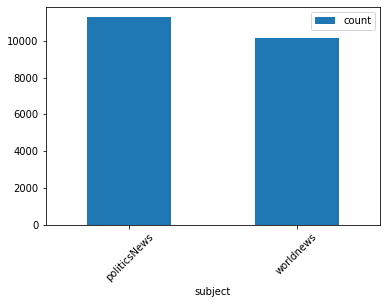

In [9]:
# Data points vs Subject

true_data.groupby('subject').size().reset_index(name = 'count').plot.bar(x='subject', y='count', rot = 45)

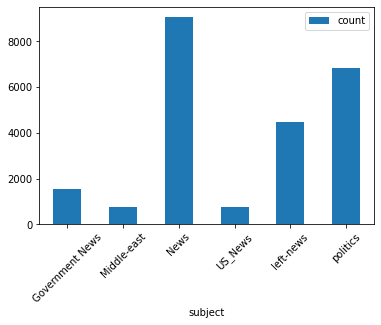

In [10]:
fake_data.groupby('subject').size().reset_index(name = 'count').plot.bar(x='subject', y='count', rot = 45)

Fake Data has more subjects than True Data. Moreover, the subject in the Fake Data seems like it's sub-categories of subject in the True Data

True data has similar distribution under the categories. It's not so similar for Fake news (also because of more categories)

In [11]:
# Date Ranges of the data
import dateutil
from dateutil import parser

def standardize_date(x):
  try:
    return dateutil.parser.parse(x).strftime(format = '%d-%m-%Y')
  except Exception as e:
    print(e)
    return None


true_data['date'] = pd.to_datetime(true_data['date'].apply(lambda x : standardize_date(x)))
true_data['year'] = true_data['date'].dt.year
true_data['month'] = true_data['date'].dt.month

fake_data['date'] = pd.to_datetime(fake_data['date'].apply(lambda x : standardize_date(x)))
fake_data['year'] = fake_data['date'].dt.year
fake_data['month'] = fake_data['date'].dt.month



Unknown string format: https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/
Unknown string format: https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/
Unknown string format: https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/
Unknown string format: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
Unknown string format: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
Unknown string format: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg
Unknown string format: https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg
Unknown string format: MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]
Unknown string format: htt

In [12]:
print(f"True Data ranges from {true_data['date'].min().strftime(format = '%d-%m-%Y')} to {true_data['date'].max().strftime(format = '%d-%m-%Y')}")
print(f"True Data ranges from {fake_data['date'].min().strftime(format = '%d-%m-%Y')} to {fake_data['date'].max().strftime(format = '%d-%m-%Y')}")

True Data ranges from 02-01-2016 to 31-12-2017
True Data ranges from 04-01-2015 to 19-02-2018


In [13]:
true_data.head()

,title,text,subject,date,year,month
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,2017,12
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,2017,12
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,2017,12
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,2017,12
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,2017,12


How many True/Fake news articles are posted by the time period?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fb74ee0d0>]],
      dtype=object)

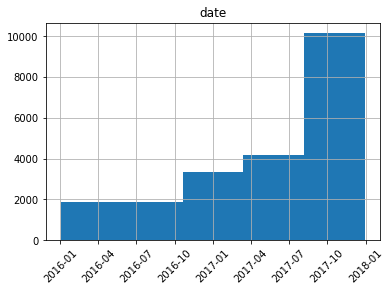

In [14]:
true_data.hist('date',bins=5, xrot = 45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fb6cf4290>]],
      dtype=object)

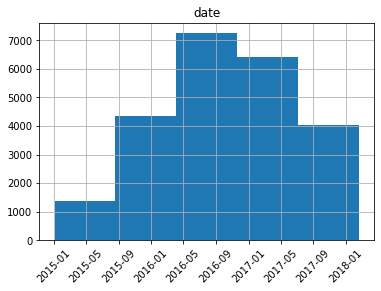

In [15]:
fake_data.hist('date',bins=5, xrot = 45)

Looks like Fake news peaked around May 2015, and True news around October 2017. Again different variation. 

### Token Analysis

In [17]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


def clean_text(x):
  x = word_tokenize(x)
  x = [i.lower() for i in x]
  x = [i for i in x if i not in stopwords.words('english')]
  x = [i for i in x if len(i) > 2]
  return x

def get_token_len(x):
  return len(clean_text(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


444

In [ ]:
from collections import Counter


# Woww, this step is terribly slow! Look into this

########################### This approach cancelled after 10 min #####################
# true_data_clean_token_lens = [len(clean_text(i)) for i in true_data['text']]

########################### This approach also cancelled after 10 min ################
# from multiprocessing import Pool
# with Pool(10) as p:
#     output = p.map(get_token_len, true_data['text'].values)



In [ ]:
true_data['clean_token_len'] = true_data['text'].apply(lambda x : get_token_len(x))

In [ ]:
import matplotlib.pyplot as plt

plt.bar(*zip(*D.items()))
plt.show()